#### Import the required libraries

In [1]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd
import numpy as np
import random
random.seed(42)
import networkx as nx
import pylab as plt
import zipfile
from pathlib import Path

### extracting initial dataset

In [2]:
initial_dataset = Path("../datasets/Initial_training_data/train_data_whole_merged.csv")
if not initial_dataset.exists():
    with zipfile.ZipFile("../datasets/Initial_training_data.zip","r") as zip_ref:
        zip_ref.extractall("../datasets/Initial_training_data")

###  1. Importing the dataset and the genes present in RHO GDI pathway


###  2. Discretizing the Dataset for simplicity

In [3]:
genes = ['Disease Status (NSCLC: primary tumors; Normal: non-tumor lung tissues)','PIP4K2A','RTKN','ECM1','ITGB2','GNA11','GPRC5A','PAK2','CD44','ARHGAP6','ARHGEF19','CDH1','CDH5','CFL2','DLC1','GNG11','PIP5K1B','RHOJ','ERMP1','PAK1','CDC42-IT1','RAC2','ROCK2','LIMK2','DGKZ','DAGLB','PAAF1','PIP','ERMAP','LACTB']
train = pd.read_csv('../datasets/Initial_training_data/train_data_whole_merged.csv')  
key_genes = train[genes]

a = []
for i in key_genes['Disease Status (NSCLC: primary tumors; Normal: non-tumor lung tissues)']:
    if i == 'NSCLC':
        a.append(1)
    else:
        a.append(0)
key_genes['Disease Status (NSCLC: primary tumors; Normal: non-tumor lung tissues)'] = a

def getdf(NSCLC):
    b = []
    for i in key_genes.columns[1:]:
        m = np.mean(key_genes[i])
        a = []
        for j in key_genes[i]:
            if j>=m:
                a.append(1)
            else:
                a.append(0)
        key_genes[i] = a
        
    key_genes1 = key_genes[key_genes['Disease Status (NSCLC: primary tumors; Normal: non-tumor lung tissues)'] == NSCLC]
    
    key_genes1 = key_genes1.drop(['Disease Status (NSCLC: primary tumors; Normal: non-tumor lung tissues)'],axis=1)
        
    return key_genes1

C:\Users\SARANSH\Anaconda3\envs\saransh\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


### Input 0 if you want to analyze the probabilities on healthy dataset
### Input 1 if you want to analyze the probabilities on NSCLC dataset

In [4]:
NSCLC_ = int(input("Input 0 if you want to analyze the probabilities on healthy dataset and 1 if you want to analyze on NSCLC dataset"))

Input 0 if you want to analyze the probabilities on healthy dataset and 1 if you want to analyze on NSCLC dataset0


In [5]:
df = getdf(NSCLC_)
df = df.drop(['CDH5'],axis=1)
genes = df.columns

C:\Users\SARANSH\Anaconda3\envs\saransh\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Building the Network for processing

In [6]:
nodes = genes
model = BayesianModel([('GPRC5A','GNA11'),('GNA11','ARHGEF19'),('RTKN','ARHGEF19'),('ITGB2','ARHGEF19'),('ECM1','ITGB2'),('GPRC5A','GNG11'),('CDH1','ARHGEF19'), ('GNG11', 'ARHGEF19'),('DLC1','ARHGEF19'),('ARHGEF19','RHOJ'),
                      ('ARHGAP6','DLC1'),('PAK2','DLC1'),('ERMP1','DLC1'),
                      ('RHOJ','CDC42-IT1'),('CDC42-IT1','PAK1'),('PAK1','LIMK2'),('LIMK2','CFL2'),('RHOJ','RAC2'),('RAC2','PAK1'),
                      ('RHOJ','ROCK2'),('ROCK2','LIMK2'),('RHOJ','DGKZ'),('DAGLB','DGKZ'),('DGKZ','PAAF1'),('PAAF1','PIP5K1B'),
                      ('PIP','PIP5K1B'),('CD44','ERMAP'),('RHOJ','ERMAP'),('ERMAP','LACTB'),('PIP5K1B','PIP4K2A'),('PIP4K2A','ERMAP')])
model.fit(df)
model.get_cpds()

[<TabularCPD representing P(ARHGAP6:2) at 0x2343dfb6f08>,
 <TabularCPD representing P(ARHGEF19:2 | CDH1:2, DLC1:2, GNA11:2, GNG11:2, ITGB2:2, RTKN:2) at 0x2343e1fb8c8>,
 <TabularCPD representing P(CD44:2) at 0x2345afc0948>,
 <TabularCPD representing P(CDC42-IT1:2 | RHOJ:2) at 0x2345afc0748>,
 <TabularCPD representing P(CDH1:2) at 0x2345afc0d08>,
 <TabularCPD representing P(CFL2:2 | LIMK2:2) at 0x2345ac7d148>,
 <TabularCPD representing P(DAGLB:2) at 0x2345ac83f88>,
 <TabularCPD representing P(DGKZ:2 | DAGLB:2, RHOJ:2) at 0x2345ac83888>,
 <TabularCPD representing P(DLC1:2 | ARHGAP6:2, ERMP1:2, PAK2:2) at 0x2345ac64588>,
 <TabularCPD representing P(ECM1:2) at 0x2345ac64188>,
 <TabularCPD representing P(ERMAP:2 | CD44:2, PIP4K2A:2, RHOJ:2) at 0x2345ac83c08>,
 <TabularCPD representing P(ERMP1:2) at 0x2345ac83d48>,
 <TabularCPD representing P(GNA11:2 | GPRC5A:2) at 0x2345ac7f648>,
 <TabularCPD representing P(GNG11:2 | GPRC5A:2) at 0x2345ac7f908>,
 <TabularCPD representing P(GPRC5A:2) at 0x23

### Visualize the network in 2D 

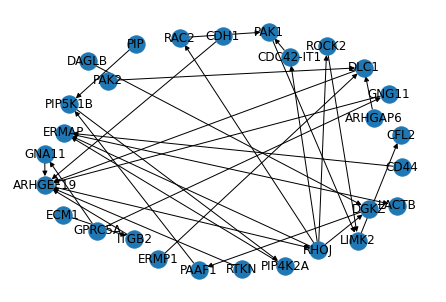

In [7]:
nx.draw(model, with_labels=True)
plt.show()

#### Calculating the probabilities of Genes being upregulated

In [8]:
infer = VariableElimination(model)

for i in df.columns:
    
    print(i)
    
    posterior_diff = infer.query([i])
    
    print(posterior_diff)

Eliminating: DLC1:   0%|                                                                        | 0/27 [00:00<?, ?it/s]


PIP4K2A


Eliminating: GPRC5A: 100%|█████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 88.61it/s]

Finding Elimination Order: :   0%|                                                              | 0/27 [00:00<?, ?it/s]

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

Eliminating: ARHGAP6:   0%|                                                                     | 0/27 [00:00<?, ?it/s]

Eliminating: CFL2:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: ERMAP:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: DGKZ:   0%|        

+------------+----------------+
| PIP4K2A    |   phi(PIP4K2A) |
+============+================+
| PIP4K2A(0) |         0.1347 |
+------------+----------------+
| PIP4K2A(1) |         0.8653 |
+------------+----------------+
RTKN




Eliminating: DLC1:  33%|█████████████████████▎                                          | 9/27 [00:00<00:00, 75.20it/s]

Eliminating: CD44:  33%|█████████████████████▎                                          | 9/27 [00:00<00:00, 75.20it/s]

Eliminating: PIP:  33%|█████████████████████▋                                           | 9/27 [00:00<00:00, 75.20it/s]

Eliminating: GNG11:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 75.20it/s]

Eliminating: ROCK2:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 75.20it/s]

Eliminating: LIMK2:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 75.20it/s]

Eliminating: LACTB:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 75.20it/s]

Eliminating: PIP5K1B:  33%|████████████████████▎                                        | 9/27 [00:00<00:00, 75.20it/s]

Eliminating: PIP4K2A:  33%|███

+---------+-------------+
| RTKN    |   phi(RTKN) |
+=========+=============+
| RTKN(0) |      0.8653 |
+---------+-------------+
| RTKN(1) |      0.1347 |
+---------+-------------+
ECM1


Eliminating: RTKN:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 77.87it/s]

Eliminating: CD44:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 77.87it/s]

Eliminating: PIP:  30%|███████████████████▎                                             | 8/27 [00:00<00:00, 77.87it/s]

Eliminating: GNG11:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 77.87it/s]

Eliminating: ROCK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 77.87it/s]

Eliminating: LIMK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 77.87it/s]

Eliminating: LACTB:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 77.87it/s]

Eliminating: PIP5K1B:  30%|██████████████████                                           | 8/27 [00:00<00:00, 77.87it/s]

Eliminating: PIP5K1B:  63%|█████

+---------+-------------+
| ECM1    |   phi(ECM1) |
+=========+=============+
| ECM1(0) |      0.8135 |
+---------+-------------+
| ECM1(1) |      0.1865 |
+---------+-------------+
ITGB2


Eliminating: LIMK2:  37%|██████████████████████▉                                       | 10/27 [00:00<00:00, 96.41it/s]


Eliminating: LACTB:  37%|██████████████████████▉                                       | 10/27 [00:00<00:00, 96.41it/s]


Eliminating: PIP5K1B:  37%|██████████████████████▏                                     | 10/27 [00:00<00:00, 96.41it/s]


Eliminating: PIP4K2A:  37%|██████████████████████▏                                     | 10/27 [00:00<00:00, 96.41it/s]


Eliminating: CDH1:  37%|███████████████████████▎                                       | 10/27 [00:00<00:00, 96.41it/s]


Eliminating: GNA11:  37%|██████████████████████▉                                       | 10/27 [00:00<00:00, 96.41it/s]


Eliminating: DAGLB:  37%|██████████████████████▉                                       | 10/27 [00:00<00:00, 96.41it/s]


Eliminating: DAGLB:  74%|█████████████████████████████████████████████▉                | 20/27 [00:00<00:00, 95.86it/s]


Eliminating: ARHGEF19:  

+----------+--------------+
| ITGB2    |   phi(ITGB2) |
+==========+==============+
| ITGB2(0) |       0.2746 |
+----------+--------------+
| ITGB2(1) |       0.7254 |
+----------+--------------+
GNA11




Eliminating: ITGB2:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: ITGB2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 74.68it/s]

Eliminating: DLC1:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 74.68it/s]

Eliminating: RTKN:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 74.68it/s]

Eliminating: CD44:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 74.68it/s]

Eliminating: PIP:  30%|███████████████████▎                                             | 8/27 [00:00<00:00, 74.68it/s]

Eliminating: GNG11:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 74.68it/s]

Eliminating: ROCK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 74.68it/s]

Eliminating: LIMK2:  30%|█████

+----------+--------------+
| GNA11    |   phi(GNA11) |
+==========+==============+
| GNA11(0) |       0.1658 |
+----------+--------------+
| GNA11(1) |       0.8342 |
+----------+--------------+
GPRC5A






Eliminating: PIP:  33%|█████████████████████▋                                           | 9/27 [00:00<00:00, 73.37it/s]



Eliminating: GNG11:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 73.37it/s]



Eliminating: ROCK2:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 73.37it/s]



Eliminating: LIMK2:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 73.37it/s]



Eliminating: LACTB:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 73.37it/s]



Eliminating: PIP5K1B:  33%|████████████████████▎                                        | 9/27 [00:00<00:00, 73.37it/s]



Eliminating: PIP4K2A:  33%|████████████████████▎                                        | 9/27 [00:00<00:00, 73.37it/s]



Eliminating: PIP4K2A:  67%|████████████████████████████████████████                    | 18/27 [00:00<00:00, 77.13it/s]



Eliminating:

+-----------+---------------+
| GPRC5A    |   phi(GPRC5A) |
+===========+===============+
| GPRC5A(0) |        0.0207 |
+-----------+---------------+
| GPRC5A(1) |        0.9793 |
+-----------+---------------+
PAK2


Eliminating: DLC1:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 64.69it/s]




Eliminating: RTKN:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 64.69it/s]




Eliminating: CD44:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 64.69it/s]




Eliminating: PIP:  30%|███████████████████▎                                             | 8/27 [00:00<00:00, 64.69it/s]




Eliminating: GNG11:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 64.69it/s]




Eliminating: ROCK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 64.69it/s]




Eliminating: LIMK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 64.69it/s]




Eliminating: LACTB:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 64.69it/s]




Eliminat

+---------+-------------+
| PAK2    |   phi(PAK2) |
+=========+=============+
| PAK2(0) |      0.3316 |
+---------+-------------+
| PAK2(1) |      0.6684 |
+---------+-------------+
CD44


Eliminating: GNG11:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 79.42it/s]



Eliminating: PIP:  30%|███████████████████▎                                             | 8/27 [00:00<00:00, 79.42it/s]



Eliminating: ROCK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 79.42it/s]



Eliminating: LIMK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 79.42it/s]



Eliminating: LACTB:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 79.42it/s]



Eliminating: PIP5K1B:  30%|██████████████████                                           | 8/27 [00:00<00:00, 79.42it/s]



Eliminating: PIP4K2A:  30%|██████████████████                                           | 8/27 [00:00<00:00, 79.42it/s]



Eliminating: PIP4K2A:  63%|█████████████████████████████████████▊                      | 17/27 [00:00<00:00, 80.19it/s]



Eliminating: CDH

+---------+-------------+
| CD44    |   phi(CD44) |
+=========+=============+
| CD44(0) |      0.0881 |
+---------+-------------+
| CD44(1) |      0.9119 |
+---------+-------------+
ARHGAP6


Eliminating: DLC1:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 58.13it/s]



Eliminating: RTKN:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 58.13it/s]



Eliminating: CD44:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 58.13it/s]



Eliminating: PIP:  30%|███████████████████▎                                             | 8/27 [00:00<00:00, 58.13it/s]



Eliminating: GNG11:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 58.13it/s]



Eliminating: ROCK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 58.13it/s]



Eliminating: LIMK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 58.13it/s]



Eliminating: LACTB:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 58.13it/s]



Eliminating: LAC

+------------+----------------+
| ARHGAP6    |   phi(ARHGAP6) |
+============+================+
| ARHGAP6(0) |         0.0622 |
+------------+----------------+
| ARHGAP6(1) |         0.9378 |
+------------+----------------+
ARHGEF19


Eliminating: CD44:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 69.75it/s]



Eliminating: PIP:  30%|███████████████████▎                                             | 8/27 [00:00<00:00, 69.75it/s]



Eliminating: GNG11:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 69.75it/s]



Eliminating: ROCK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 69.75it/s]



Eliminating: LIMK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 69.75it/s]



Eliminating: LACTB:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 69.75it/s]



Eliminating: PIP5K1B:  30%|██████████████████                                           | 8/27 [00:00<00:00, 69.75it/s]



Eliminating: PIP5K1B:  63%|█████████████████████████████████████▊                      | 17/27 [00:00<00:00, 73.93it/s]



Eliminating: PIP

+-------------+-----------------+
| ARHGEF19    |   phi(ARHGEF19) |
+=============+=================+
| ARHGEF19(0) |          0.9276 |
+-------------+-----------------+
| ARHGEF19(1) |          0.0724 |
+-------------+-----------------+
CDH1


Eliminating: GNG11:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 76.48it/s]



Eliminating: ROCK2:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 76.48it/s]



Eliminating: LIMK2:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 76.48it/s]



Eliminating: LACTB:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 76.48it/s]



Eliminating: PIP5K1B:  33%|████████████████████▎                                        | 9/27 [00:00<00:00, 76.48it/s]



Eliminating: PIP4K2A:  33%|████████████████████▎                                        | 9/27 [00:00<00:00, 76.48it/s]



Eliminating: GNA11:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 76.48it/s]



Eliminating: GNA11:  70%|███████████████████████████████████████████▋                  | 19/27 [00:00<00:00, 80.75it/s]



Eliminating: DAG

+---------+-------------+
| CDH1    |   phi(CDH1) |
+=========+=============+
| CDH1(0) |      0.8549 |
+---------+-------------+
| CDH1(1) |      0.1451 |
+---------+-------------+
CFL2


Eliminating: PIP:  30%|███████████████████▎                                             | 8/27 [00:00<00:00, 73.59it/s]




Eliminating: GNG11:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 73.59it/s]




Eliminating: ROCK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 73.59it/s]




Eliminating: LIMK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 73.59it/s]




Eliminating: LACTB:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 73.59it/s]




Eliminating: PIP5K1B:  30%|██████████████████                                           | 8/27 [00:00<00:00, 73.59it/s]




Eliminating: PIP4K2A:  30%|██████████████████                                           | 8/27 [00:00<00:00, 73.59it/s]




Eliminating: CDH1:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 73.59it/s]




Eliminat

+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0830 |
+---------+-------------+
| CFL2(1) |      0.9170 |
+---------+-------------+
DLC1



Eliminating: GPRC5A: 100%|█████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 86.62it/s]

Finding Elimination Order: :   0%|                                                              | 0/27 [00:00<?, ?it/s]

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

Eliminating: ARHGAP6:   0%|                                                                     | 0/27 [00:00<?, ?it/s]

Eliminating: CFL2:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: ERMAP:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: DGKZ:   0%|       

+---------+-------------+
| DLC1    |   phi(DLC1) |
+=========+=============+
| DLC1(0) |      0.0288 |
+---------+-------------+
| DLC1(1) |      0.9712 |
+---------+-------------+
GNG11




Eliminating: CD44:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 78.65it/s]

Eliminating: PIP:  30%|███████████████████▎                                             | 8/27 [00:00<00:00, 78.65it/s]

Eliminating: ROCK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 78.65it/s]

Eliminating: LIMK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 78.65it/s]

Eliminating: LACTB:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 78.65it/s]

Eliminating: PIP5K1B:  30%|██████████████████                                           | 8/27 [00:00<00:00, 78.65it/s]

Eliminating: PIP4K2A:  30%|██████████████████                                           | 8/27 [00:00<00:00, 78.65it/s]

Eliminating: CDH1:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 78.65it/s]

Eliminating: CDH1:  67%|██████

+----------+--------------+
| GNG11    |   phi(GNG11) |
+==========+==============+
| GNG11(0) |       0.0363 |
+----------+--------------+
| GNG11(1) |       0.9637 |
+----------+--------------+
PIP5K1B


Eliminating: DLC1:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 77.88it/s]


+------------+----------------+
| PIP5K1B    |   phi(PIP5K1B) |
+============+================+
| PIP5K1B(0) |         0.0415 |
+------------+----------------+
| PIP5K1B(1) |         0.9585 |
+------------+----------------+
RHOJ


Eliminating: GPRC5A: 100%|█████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 89.35it/s]

Finding Elimination Order: :   0%|                                                              | 0/27 [00:00<?, ?it/s]

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

Eliminating: ARHGAP6:   0%|                                                                     | 0/27 [00:00<?, ?it/s]

Eliminating: CFL2:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: ERMAP:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: DGKZ:   0%|        

+---------+-------------+
| RHOJ    |   phi(RHOJ) |
+=========+=============+
| RHOJ(0) |      0.0652 |
+---------+-------------+
| RHOJ(1) |      0.9348 |
+---------+-------------+
ERMP1




Eliminating: RTKN:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 66.09it/s]

Eliminating: CD44:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 66.09it/s]

Eliminating: PIP:  30%|███████████████████▎                                             | 8/27 [00:00<00:00, 66.09it/s]

Eliminating: GNG11:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 66.09it/s]

Eliminating: ROCK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 66.09it/s]

Eliminating: LIMK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 66.09it/s]

Eliminating: LACTB:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 66.09it/s]

Eliminating: PIP5K1B:  30%|██████████████████                                           | 8/27 [00:00<00:00, 66.09it/s]

Eliminating: PIP5K1B:  59%|███

+----------+--------------+
| ERMP1    |   phi(ERMP1) |
+==========+==============+
| ERMP1(0) |       0.4352 |
+----------+--------------+
| ERMP1(1) |       0.5648 |
+----------+--------------+
PAK1


Eliminating: DLC1:  33%|█████████████████████▎                                          | 9/27 [00:00<00:00, 73.97it/s]


Eliminating: RTKN:  33%|█████████████████████▎                                          | 9/27 [00:00<00:00, 73.97it/s]


Eliminating: CD44:  33%|█████████████████████▎                                          | 9/27 [00:00<00:00, 73.97it/s]


Eliminating: PIP:  33%|█████████████████████▋                                           | 9/27 [00:00<00:00, 73.97it/s]


Eliminating: GNG11:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 73.97it/s]


Eliminating: ROCK2:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 73.97it/s]


Eliminating: LIMK2:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 73.97it/s]


Eliminating: LACTB:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 73.97it/s]


Eliminating: PIP5K1B:  3

+---------+-------------+
| PAK1    |   phi(PAK1) |
+=========+=============+
| PAK1(0) |      0.9457 |
+---------+-------------+
| PAK1(1) |      0.0543 |
+---------+-------------+
CDC42-IT1


Eliminating: ITGB2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 77.88it/s]


Eliminating: DLC1:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 77.88it/s]


Eliminating: RTKN:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 77.88it/s]


Eliminating: CD44:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 77.88it/s]


Eliminating: PIP:  30%|███████████████████▎                                             | 8/27 [00:00<00:00, 77.88it/s]


Eliminating: GNG11:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 77.88it/s]


Eliminating: ROCK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 77.88it/s]


Eliminating: LIMK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 77.88it/s]


Eliminating: LACTB:  30%

+--------------+------------------+
| CDC42-IT1    |   phi(CDC42-IT1) |
+==============+==================+
| CDC42-IT1(0) |           0.4974 |
+--------------+------------------+
| CDC42-IT1(1) |           0.5026 |
+--------------+------------------+
RAC2





Finding Elimination Order: :   4%|██                                                    | 1/27 [00:40<13:00, 30.02s/it]


Finding Elimination Order: :   7%|████                                                  | 2/27 [00:40<10:00, 24.02s/it]

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

Eliminating: ARHGAP6:   0%|                                                                     | 0/27 [00:00<?, ?it/s]

Eliminating: CFL2:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: ERMAP:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: DGKZ:   0%|    

+---------+-------------+
| RAC2    |   phi(RAC2) |
+=========+=============+
| RAC2(0) |      0.2020 |
+---------+-------------+
| RAC2(1) |      0.7980 |
+---------+-------------+
ROCK2


Eliminating: DLC1:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 66.29it/s]



Eliminating: RTKN:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 66.29it/s]



Eliminating: CD44:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 66.29it/s]



Eliminating: PIP:  30%|███████████████████▎                                             | 8/27 [00:00<00:00, 66.29it/s]



Eliminating: GNG11:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 66.29it/s]



Eliminating: LIMK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 66.29it/s]



Eliminating: LIMK2:  52%|████████████████████████████████▏                             | 14/27 [00:00<00:00, 63.91it/s]



Eliminating: LACTB:  52%|████████████████████████████████▏                             | 14/27 [00:00<00:00, 63.91it/s]



Eliminating: PIP

+----------+--------------+
| ROCK2    |   phi(ROCK2) |
+==========+==============+
| ROCK2(0) |       0.1576 |
+----------+--------------+
| ROCK2(1) |       0.8424 |
+----------+--------------+
LIMK2







Eliminating: PIP:  33%|█████████████████████▋                                           | 9/27 [00:00<00:00, 77.13it/s]




Eliminating: GNG11:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 77.13it/s]




Eliminating: ROCK2:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 77.13it/s]




Eliminating: LACTB:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 77.13it/s]




Eliminating: PIP4K2A:  33%|████████████████████▎                                        | 9/27 [00:00<00:00, 77.13it/s]




Eliminating: PIP5K1B:  33%|████████████████████▎                                        | 9/27 [00:00<00:00, 77.13it/s]




Eliminating: CDH1:  33%|█████████████████████▎                                          | 9/27 [00:00<00:00, 77.13it/s]




Eliminating: GNA11:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 77.13it/s]




Eli

+----------+--------------+
| LIMK2    |   phi(LIMK2) |
+==========+==============+
| LIMK2(0) |       0.4567 |
+----------+--------------+
| LIMK2(1) |       0.5433 |
+----------+--------------+
DGKZ


Eliminating: ROCK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 75.68it/s]



Eliminating: LIMK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 75.68it/s]



Eliminating: LACTB:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 75.68it/s]



Eliminating: PIP5K1B:  30%|██████████████████                                           | 8/27 [00:00<00:00, 75.68it/s]



Eliminating: PIP4K2A:  30%|██████████████████                                           | 8/27 [00:00<00:00, 75.68it/s]



Eliminating: CDH1:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 75.68it/s]



Eliminating: CDH1:  67%|██████████████████████████████████████████                     | 18/27 [00:00<00:00, 80.51it/s]



Eliminating: GNA11:  67%|█████████████████████████████████████████▎                    | 18/27 [00:00<00:00, 80.51it/s]



Eliminating: DAG

+---------+-------------+
| DGKZ    |   phi(DGKZ) |
+=========+=============+
| DGKZ(0) |      0.5335 |
+---------+-------------+
| DGKZ(1) |      0.4665 |
+---------+-------------+
DAGLB


Eliminating: DLC1:  33%|█████████████████████▎                                          | 9/27 [00:00<00:00, 75.83it/s]




Eliminating: RTKN:  33%|█████████████████████▎                                          | 9/27 [00:00<00:00, 75.83it/s]




Eliminating: CD44:  33%|█████████████████████▎                                          | 9/27 [00:00<00:00, 75.83it/s]




Eliminating: PIP:  33%|█████████████████████▋                                           | 9/27 [00:00<00:00, 75.83it/s]




Eliminating: GNG11:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 75.83it/s]




Eliminating: ROCK2:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 75.83it/s]




Eliminating: LIMK2:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 75.83it/s]




Eliminating: LACTB:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 75.83it/s]




Eliminat

+----------+--------------+
| DAGLB    |   phi(DAGLB) |
+==========+==============+
| DAGLB(0) |       0.5959 |
+----------+--------------+
| DAGLB(1) |       0.4041 |
+----------+--------------+
PAAF1


Eliminating: DLC1:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 74.97it/s]



Eliminating: RTKN:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 74.97it/s]



Eliminating: CD44:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 74.97it/s]



Eliminating: PIP:  30%|███████████████████▎                                             | 8/27 [00:00<00:00, 74.97it/s]



Eliminating: GNG11:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 74.97it/s]



Eliminating: ROCK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 74.97it/s]



Eliminating: LIMK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 74.97it/s]



Eliminating: LACTB:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 74.97it/s]



Eliminating: PIP

+----------+--------------+
| PAAF1    |   phi(PAAF1) |
+==========+==============+
| PAAF1(0) |       0.8031 |
+----------+--------------+
| PAAF1(1) |       0.1969 |
+----------+--------------+
PIP


Eliminating: ITGB2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 78.64it/s]



Eliminating: DLC1:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 78.64it/s]



Eliminating: RTKN:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 78.64it/s]



Eliminating: CD44:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 78.64it/s]



Eliminating: GNG11:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 78.64it/s]



Eliminating: ROCK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 78.64it/s]



Eliminating: LIMK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 78.64it/s]



Eliminating: LACTB:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 78.64it/s]



Eliminating: PIP

+--------+------------+
| PIP    |   phi(PIP) |
+========+============+
| PIP(0) |     0.6062 |
+--------+------------+
| PIP(1) |     0.3938 |
+--------+------------+
ERMAP


Eliminating: DLC1:   0%|                                                                        | 0/27 [00:00<?, ?it/s]



Eliminating: DLC1:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 72.27it/s]



Eliminating: RTKN:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 72.27it/s]



Eliminating: CD44:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 72.27it/s]



Eliminating: PIP:  30%|███████████████████▎                                             | 8/27 [00:00<00:00, 72.27it/s]



Eliminating: GNG11:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 72.27it/s]



Eliminating: ROCK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 72.27it/s]



Eliminating: LIMK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 72.27it/s]



Eliminating: LAC

+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2873 |
+----------+--------------+
| ERMAP(1) |       0.7127 |
+----------+--------------+
LACTB



Eliminating: GPRC5A: 100%|█████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 90.99it/s]


+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3314 |
+----------+--------------+
| LACTB(1) |       0.6686 |
+----------+--------------+


### Calculating the Conditional Probabilities 

#### p(x=1 | y=0)

In [9]:
# evidence_gene = ['ARHGAP6','ARHGEF19','CDH1','DLC1','GNG11','PIP5K1B','RHOJ']

evidence_gene = ['PIP4K2A','RTKN','ECM1','ITGB2','GNA11','GPRC5A','PAK2','CD44','ARHGAP6','ARHGEF19','CDH1','DLC1','GNG11','PIP5K1B','RHOJ','ERMP1','PAK1','CDC42-IT1','RAC2','ROCK2','LIMK2','DGKZ','DAGLB','PAAF1','PIP']



gene = ['ERMAP','LACTB','CFL2']
for i in gene:
    if i != 'CFL2':
        for j in range(len(evidence_gene)):
            posterior_diff = infer.query({i}, evidence={evidence_gene[j]:0})
            print('gene (1):', i, ' || evidence gene(0):', evidence_gene[j])
            print(posterior_diff)

    if i == 'CFL2':
        
       
            for j in range(len(evidence_gene)):
            
                if evidence_gene[j] == 'CFL2':
                    print(1)
                    pass
                else:
                    posterior_diff = infer.query({i}, evidence={evidence_gene[j]:0})
                    print('gene (1):', i, ' || evidence gene(0):', evidence_gene[j])
                    print(posterior_diff)

Eliminating: PIP5K1B:  42%|█████████████████████████▍                                  | 11/26 [00:00<00:00, 98.48it/s]


gene (1): ERMAP  || evidence gene(0): PIP4K2A
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.3195 |
+----------+--------------+
| ERMAP(1) |       0.6805 |
+----------+--------------+


Eliminating: PIP5K1B:  38%|███████████████████████                                     | 10/26 [00:00<00:00, 94.59it/s]

gene (1): ERMAP  || evidence gene(0): RTKN
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2869 |
+----------+--------------+
| ERMAP(1) |       0.7131 |
+----------+--------------+



Eliminating: DGKZ:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

gene (1): ERMAP  || evidence gene(0): ECM1
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2874 |
+----------+--------------+
| ERMAP(1) |       0.7126 |
+----------+--------------+



Eliminating: LACTB:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 97.07it/s]

gene (1): ERMAP  || evidence gene(0): ITGB2
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2891 |
+----------+--------------+
| ERMAP(1) |       0.7109 |
+----------+--------------+



Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 75.67it/s]

gene (1): ERMAP  || evidence gene(0): GNA11
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2898 |
+----------+--------------+
| ERMAP(1) |       0.7102 |
+----------+--------------+



Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


gene (1): ERMAP  || evidence gene(0): GPRC5A
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2902 |
+----------+--------------+
| ERMAP(1) |       0.7098 |
+----------+--------------+


Eliminating: GPRC5A: 100%|█████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 90.52it/s]

Finding Elimination Order: :   0%|                                                              | 0/26 [00:00<?, ?it/s]

  0%|                                                                                           | 0/26 [00:00<?, ?it/s]

Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: CFL2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: DGKZ:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: ERMP1:   0%|       

gene (1): ERMAP  || evidence gene(0): PAK2
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2878 |
+----------+--------------+
| ERMAP(1) |       0.7122 |
+----------+--------------+


Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 73.72it/s]

Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 73.72it/s]

Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 73.72it/s]

Eliminating: LACTB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 73.72it/s]

Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 73.72it/s]

Eliminating: PIP4K2A:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 73.72it/s]

Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 73.72it/s]

Eliminating: GNA11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 73.72it/s]

Eliminating: GNA11:  69%|███████

gene (1): ERMAP  || evidence gene(0): CD44
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.4315 |
+----------+--------------+
| ERMAP(1) |       0.5685 |
+----------+--------------+




Eliminating: RTKN:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: RTKN:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: CD44:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: LACTB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: PIP5K1B:  31%|███

gene (1): ERMAP  || evidence gene(0): ARHGAP6
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2944 |
+----------+--------------+
| ERMAP(1) |       0.7056 |
+----------+--------------+


Eliminating: ERMP1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: ITGB2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: RTKN:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: CD44:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: CD44:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 95.49it/s]

Eliminating: PIP:  38%|████████████████████████▌                                       | 10/26 [00:00<00:00, 95.49it/s]

Eliminating: GNG11:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 95.49it/s]

Eliminating: ROCK2:  38%|███████

gene (1): ERMAP  || evidence gene(0): ARHGEF19
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2818 |
+----------+--------------+
| ERMAP(1) |       0.7182 |
+----------+--------------+


Eliminating: ERMP1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: ITGB2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: RTKN:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: CD44:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: CD44:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 95.49it/s]


Eliminating: PIP:  38%|████████████████████████▌                                       | 10/26 [00:00<00:00, 95.49it/s]


Eliminating: GNG11:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 95.49it/s]


Eliminating: ROCK2:  38%

gene (1): ERMAP  || evidence gene(0): CDH1
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2857 |
+----------+--------------+
| ERMAP(1) |       0.7143 |
+----------+--------------+


Eliminating: PIP5K1B:  38%|███████████████████████                                     | 10/26 [00:00<00:00, 98.30it/s]

Eliminating: PIP4K2A:  38%|███████████████████████                                     | 10/26 [00:00<00:00, 98.30it/s]

Eliminating: CDH1:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 98.30it/s]

Eliminating: GNA11:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 98.30it/s]

Eliminating: DAGLB:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 98.30it/s]

Eliminating: ARHGEF19:  38%|██████████████████████▋                                    | 10/26 [00:00<00:00, 98.30it/s]

Eliminating: ARHGEF19:  77%|█████████████████████████████████████████████▍             | 20/26 [00:00<00:00, 98.59it/s]

Eliminating: PAK1:  77%|████████████████████████████████████████████████▍              | 20/26 [00:00<00:00, 98.59it/s]

Eliminating: RAC2:  77%|████████

gene (1): ERMAP  || evidence gene(0): DLC1
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.3101 |
+----------+--------------+
| ERMAP(1) |       0.6899 |
+----------+--------------+


Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 77.88it/s]

gene (1): ERMAP  || evidence gene(0): GNG11
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2924 |
+----------+--------------+
| ERMAP(1) |       0.7076 |
+----------+--------------+



Eliminating: ITGB2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


gene (1): ERMAP  || evidence gene(0): PIP5K1B
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2963 |
+----------+--------------+
| ERMAP(1) |       0.7037 |
+----------+--------------+


Eliminating: GPRC5A: 100%|█████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 99.88it/s]

Finding Elimination Order: :   0%|                                                              | 0/26 [00:00<?, ?it/s]

  0%|                                                                                           | 0/26 [00:00<?, ?it/s]

Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: CFL2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: DGKZ:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: ITGB2:   0%|       

gene (1): ERMAP  || evidence gene(0): RHOJ
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.7746 |
+----------+--------------+
| ERMAP(1) |       0.2254 |
+----------+--------------+




Eliminating: PIP:  27%|█████████████████▌                                               | 7/26 [00:00<00:00, 69.49it/s]

Eliminating: GNG11:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 69.49it/s]

Eliminating: ROCK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 69.49it/s]

Eliminating: LIMK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 69.49it/s]

Eliminating: LACTB:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 69.49it/s]

Eliminating: PIP5K1B:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 69.49it/s]

Eliminating: PIP4K2A:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 69.49it/s]

Eliminating: CDH1:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 69.49it/s]

Eliminating: GNA11:  27%|█████

gene (1): ERMAP  || evidence gene(0): ERMP1
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2874 |
+----------+--------------+
| ERMAP(1) |       0.7126 |
+----------+--------------+


Eliminating: CD44:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 75.67it/s]

Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 75.67it/s]

Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 75.67it/s]

Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 75.67it/s]

Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 75.67it/s]

Eliminating: LACTB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 75.67it/s]

Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 75.67it/s]

Eliminating: PIP4K2A:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 75.67it/s]

Eliminating: CDH1:  31%|████████

gene (1): ERMAP  || evidence gene(0): PAK1
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2873 |
+----------+--------------+
| ERMAP(1) |       0.7127 |
+----------+--------------+




Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 76.74it/s]

Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 76.74it/s]

Eliminating: LACTB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 76.74it/s]

Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 76.74it/s]

Eliminating: PIP4K2A:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 76.74it/s]

Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 76.74it/s]

Eliminating: CDH1:  69%|███████████████████████████████████████████▌                   | 18/26 [00:00<00:00, 81.15it/s]

Eliminating: GNA11:  69%|██████████████████████████████████████████▉                   | 18/26 [00:00<00:00, 81.15it/s]

Eliminating: DAGLB:  69%|█████

gene (1): ERMAP  || evidence gene(0): CDC42-IT1
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2875 |
+----------+--------------+
| ERMAP(1) |       0.7125 |
+----------+--------------+


Eliminating: CD44:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 65.67it/s]


Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 65.67it/s]


Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 65.67it/s]


Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 65.67it/s]


Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 65.67it/s]


Eliminating: LACTB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 65.67it/s]


Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 65.67it/s]


Eliminating: PIP4K2A:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 65.67it/s]


Eliminating: CDH1:  31%|

gene (1): ERMAP  || evidence gene(0): RAC2
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2814 |
+----------+--------------+
| ERMAP(1) |       0.7186 |
+----------+--------------+


Eliminating: PIP:  27%|█████████████████▌                                               | 7/26 [00:00<00:00, 67.49it/s]

Eliminating: GNG11:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 67.49it/s]

Eliminating: LIMK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 67.49it/s]

Eliminating: LACTB:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 67.49it/s]

Eliminating: PIP5K1B:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 67.49it/s]

Eliminating: PIP4K2A:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 67.49it/s]

Eliminating: PIP4K2A:  62%|████████████████████████████████████▉                       | 16/26 [00:00<00:00, 72.31it/s]

Eliminating: CDH1:  62%|██████████████████████████████████████▊                        | 16/26 [00:00<00:00, 72.31it/s]

Eliminating: GNA11:  62%|███████

gene (1): ERMAP  || evidence gene(0): ROCK2
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.4330 |
+----------+--------------+
| ERMAP(1) |       0.5670 |
+----------+--------------+


Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: DLC1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 72.26it/s]


Eliminating: RTKN:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 72.26it/s]


Eliminating: CD44:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 72.26it/s]


Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 72.26it/s]


Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.26it/s]


Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.26it/s]


Eliminating: LACTB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.26it/s]


Eliminating: PIP4K2A:  3

gene (1): ERMAP  || evidence gene(0): LIMK2
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.3033 |
+----------+--------------+
| ERMAP(1) |       0.6967 |
+----------+--------------+




Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.27it/s]

Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.27it/s]

Eliminating: LACTB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.27it/s]

Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 72.27it/s]

Eliminating: PIP4K2A:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 72.27it/s]

Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 72.27it/s]

Eliminating: GNA11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.27it/s]

Eliminating: DAGLB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.27it/s]

Eliminating: ARHGEF19:  31%|██

gene (1): ERMAP  || evidence gene(0): DGKZ
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2853 |
+----------+--------------+
| ERMAP(1) |       0.7147 |
+----------+--------------+


Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 71.62it/s]

Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 71.62it/s]

Eliminating: LACTB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 71.62it/s]

Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 71.62it/s]

Eliminating: PIP4K2A:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 71.62it/s]

Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 71.62it/s]

Eliminating: GNA11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 71.62it/s]

Eliminating: GNA11:  73%|█████████████████████████████████████████████▎                | 19/26 [00:00<00:00, 78.67it/s]

Eliminating: ARHGEF19:  73%|████

gene (1): ERMAP  || evidence gene(0): DAGLB
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2873 |
+----------+--------------+
| ERMAP(1) |       0.7127 |
+----------+--------------+




Eliminating: ROCK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 64.54it/s]

Eliminating: LIMK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 64.54it/s]

Eliminating: LACTB:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 64.54it/s]

Eliminating: PIP5K1B:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 64.54it/s]

Eliminating: PIP4K2A:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 64.54it/s]

Eliminating: CDH1:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 64.54it/s]

Eliminating: CDH1:  65%|█████████████████████████████████████████▏                     | 17/26 [00:00<00:00, 71.49it/s]

Eliminating: GNA11:  65%|████████████████████████████████████████▌                     | 17/26 [00:00<00:00, 71.49it/s]

Eliminating: DAGLB:  65%|█████

gene (1): ERMAP  || evidence gene(0): PAAF1
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2875 |
+----------+--------------+
| ERMAP(1) |       0.7125 |
+----------+--------------+


Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 73.24it/s]

Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 73.24it/s]

Eliminating: LACTB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 73.24it/s]

Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 73.24it/s]

Eliminating: PIP4K2A:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 73.24it/s]

Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 73.24it/s]

Eliminating: CDH1:  65%|█████████████████████████████████████████▏                     | 17/26 [00:00<00:00, 75.86it/s]

Eliminating: GNA11:  65%|████████████████████████████████████████▌                     | 17/26 [00:00<00:00, 75.86it/s]

Eliminating: DAGLB:  65%|███████

gene (1): ERMAP  || evidence gene(0): PIP
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.2873 |
+----------+--------------+
| ERMAP(1) |       0.7127 |
+----------+--------------+




Eliminating: ROCK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 76.48it/s]

Eliminating: LIMK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 76.48it/s]

Eliminating: PIP5K1B:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 76.48it/s]

Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 76.48it/s]

Eliminating: GNA11:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 76.48it/s]

Eliminating: DAGLB:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 76.48it/s]

Eliminating: ARHGEF19:  35%|████████████████████▊                                       | 9/26 [00:00<00:00, 76.48it/s]

Eliminating: ARHGEF19:  77%|█████████████████████████████████████████████▍             | 20/26 [00:00<00:00, 82.52it/s]

Eliminating: PAK1:  77%|██████

gene (1): LACTB  || evidence gene(0): PIP4K2A
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3341 |
+----------+--------------+
| LACTB(1) |       0.6659 |
+----------+--------------+





Eliminating: ERMP1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: ITGB2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: CD44:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: PIP:   0%|                                                                         | 0/26 [00:00<?, ?it/s]


Eliminating: PIP:  42%|██████████████████████████▋                                    | 11/26 [00:00<00:00, 107.08it/s]


Eliminating: GNG11:  42%|█████████████████████████▊                                   | 11/26 [00:00<00:00, 107.08it/s]


Eliminating: ROCK2:  42%|█████████████████████████▊                                   | 11/26 [00:00<00:00, 107.08it/s]


Eliminating: LIMK2:  

gene (1): LACTB  || evidence gene(0): RTKN
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3313 |
+----------+--------------+
| LACTB(1) |       0.6687 |
+----------+--------------+


Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: RTKN:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: RTKN:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 91.98it/s]

Eliminating: CD44:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 91.98it/s]

Eliminating: PIP:  38%|████████████████████████▌                                       | 10/26 [00:00<00:00, 91.98it/s]

Eliminating: GNG11:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 91.98it/s]

Eliminating: ROCK2:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 91.98it/s]

Eliminating: LIMK2:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 91.98it/s]

Eliminating: PIP4K2A:  38%|█████

gene (1): LACTB  || evidence gene(0): ECM1
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3314 |
+----------+--------------+
| LACTB(1) |       0.6686 |
+----------+--------------+


Eliminating: GPRC5A: 100%|████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 112.60it/s]

Finding Elimination Order: : 100%|█████████████████████████████████████████████████████| 26/26 [00:00<00:00, 67.97it/s]

Eliminating: ERMP1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

gene (1): LACTB  || evidence gene(0): ITGB2
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3315 |
+----------+--------------+
| LACTB(1) |       0.6685 |
+----------+--------------+


Finding Elimination Order: :   0%|                                                              | 0/26 [00:00<?, ?it/s]

  0%|                                                                                           | 0/26 [00:00<?, ?it/s]

Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: CFL2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: ERMAP:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: DGKZ:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: ERMP1:   0%|       

gene (1): LACTB  || evidence gene(0): GNA11
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3316 |
+----------+--------------+
| LACTB(1) |       0.6684 |
+----------+--------------+


Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: DLC1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 77.13it/s]

Eliminating: RTKN:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 77.13it/s]

Eliminating: CD44:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 77.13it/s]

Eliminating: PIP:  35%|██████████████████████▌                                          | 9/26 [00:00<00:00, 77.13it/s]

Eliminating: GNG11:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 77.13it/s]

Eliminating: ROCK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 77.13it/s]

Eliminating: LIMK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 77.13it/s]

Eliminating: PIP4K2A:  35%|█████

gene (1): LACTB  || evidence gene(0): GPRC5A
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3316 |
+----------+--------------+
| LACTB(1) |       0.6684 |
+----------+--------------+




Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.70it/s]

Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.70it/s]

Eliminating: PIP4K2A:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 72.70it/s]

Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 72.70it/s]

Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 72.70it/s]

Eliminating: GNA11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.70it/s]

Eliminating: GNA11:  69%|██████████████████████████████████████████▉                   | 18/26 [00:00<00:00, 77.90it/s]

Eliminating: DAGLB:  69%|██████████████████████████████████████████▉                   | 18/26 [00:00<00:00, 77.90it/s]

Eliminating: ARHGEF19:  69%|██

gene (1): LACTB  || evidence gene(0): PAK2
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3314 |
+----------+--------------+
| LACTB(1) |       0.6686 |
+----------+--------------+


Eliminating: PIP:  35%|██████████████████████▌                                          | 9/26 [00:00<00:00, 73.36it/s]

Eliminating: ROCK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 73.36it/s]

Eliminating: LIMK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 73.36it/s]

Eliminating: PIP4K2A:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 73.36it/s]

Eliminating: PIP5K1B:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 73.36it/s]

Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 73.36it/s]

Eliminating: GNA11:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 73.36it/s]

Eliminating: GNA11:  69%|██████████████████████████████████████████▉                   | 18/26 [00:00<00:00, 77.45it/s]

Eliminating: DAGLB:  69%|███████

gene (1): LACTB  || evidence gene(0): CD44
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3438 |
+----------+--------------+
| LACTB(1) |       0.6562 |
+----------+--------------+


Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.92it/s]

Eliminating: PIP4K2A:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 72.92it/s]

Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 72.92it/s]

Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 72.92it/s]

Eliminating: GNA11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.92it/s]

Eliminating: GNA11:  69%|██████████████████████████████████████████▉                   | 18/26 [00:00<00:00, 78.13it/s]

Eliminating: DAGLB:  69%|██████████████████████████████████████████▉                   | 18/26 [00:00<00:00, 78.13it/s]

Eliminating: ARHGEF19:  69%|████████████████████████████████████████▊                  | 18/26 [00:00<00:00, 78.13it/s]

Eliminating: PAK1:  69%|████████

gene (1): LACTB  || evidence gene(0): ARHGAP6
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3320 |
+----------+--------------+
| LACTB(1) |       0.6680 |
+----------+--------------+




Finding Elimination Order: :   4%|██                                                    | 1/26 [00:40<12:30, 30.03s/it]

Finding Elimination Order: :   0%|                                                              | 0/26 [00:00<?, ?it/s]


  0%|                                                                                           | 0/26 [00:00<?, ?it/s]


Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]


Eliminating: CFL2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: PAK2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: ERMAP:   0%|                                                                       | 0/26 [00:00<?, ?it/s]




gene (1): LACTB  || evidence gene(0): ARHGEF19
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3309 |
+----------+--------------+
| LACTB(1) |       0.6691 |
+----------+--------------+


Eliminating: PAAF1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: DGKZ:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: ERMP1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: ITGB2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: RTKN:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: RTKN:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 92.84it/s]


Eliminating: CD44:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 92.84it/s]


Eliminating: PIP:  38%|█

gene (1): LACTB  || evidence gene(0): CDH1
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3312 |
+----------+--------------+
| LACTB(1) |       0.6688 |
+----------+--------------+


Eliminating: LIMK2:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 95.49it/s]



Eliminating: PIP4K2A:  38%|███████████████████████                                     | 10/26 [00:00<00:00, 95.49it/s]



Eliminating: PIP5K1B:  38%|███████████████████████                                     | 10/26 [00:00<00:00, 95.49it/s]



Eliminating: CDH1:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 95.49it/s]



Eliminating: GNA11:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 95.49it/s]



Eliminating: DAGLB:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 95.49it/s]



Eliminating: DAGLB:  73%|█████████████████████████████████████████████▎                | 19/26 [00:00<00:00, 91.57it/s]



Eliminating: ARHGEF19:  73%|███████████████████████████████████████████                | 19/26 [00:00<00:00, 91.57it/s]



Eliminating: PAK

gene (1): LACTB  || evidence gene(0): DLC1
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3333 |
+----------+--------------+
| LACTB(1) |       0.6667 |
+----------+--------------+


Eliminating: DGKZ:   0%|                                                                        | 0/26 [00:00<?, ?it/s]




Eliminating: ERMP1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]




Eliminating: ITGB2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]




Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]




Eliminating: RTKN:   0%|                                                                        | 0/26 [00:00<?, ?it/s]




Eliminating: RTKN:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 91.99it/s]




Eliminating: CD44:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 91.99it/s]




Eliminating: PIP:  38%|████████████████████████▌                                       | 10/26 [00:00<00:00, 91.99it/s]




Eliminat

gene (1): LACTB  || evidence gene(0): GNG11
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3318 |
+----------+--------------+
| LACTB(1) |       0.6682 |
+----------+--------------+


Eliminating: ITGB2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 70.04it/s]



Eliminating: DLC1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 70.04it/s]



Eliminating: RTKN:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 70.04it/s]



Eliminating: CD44:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 70.04it/s]



Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 70.04it/s]



Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 70.04it/s]



Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 70.04it/s]



Eliminating: ROCK2:  54%|█████████████████████████████████▍                            | 14/26 [00:00<00:00, 66.42it/s]



Eliminating: LIM

gene (1): LACTB  || evidence gene(0): PIP5K1B
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3321 |
+----------+--------------+
| LACTB(1) |       0.6679 |
+----------+--------------+






Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]



Eliminating: DLC1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 75.83it/s]



Eliminating: RTKN:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 75.83it/s]



Eliminating: CD44:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 75.83it/s]



Eliminating: PIP:  35%|██████████████████████▌                                          | 9/26 [00:00<00:00, 75.83it/s]



Eliminating: GNG11:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 75.83it/s]



Eliminating: ROCK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 75.83it/s]



Eliminating: LIMK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 75.83it/s]



Eliminating:

gene (1): LACTB  || evidence gene(0): RHOJ
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3734 |
+----------+--------------+
| LACTB(1) |       0.6266 |
+----------+--------------+


Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]




Eliminating: DLC1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 69.15it/s]




Eliminating: RTKN:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 69.15it/s]




Eliminating: CD44:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 69.15it/s]




Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 69.15it/s]




Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.15it/s]




Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.15it/s]




Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.15it/s]




Eliminat

gene (1): LACTB  || evidence gene(0): ERMP1
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3314 |
+----------+--------------+
| LACTB(1) |       0.6686 |
+----------+--------------+






Eliminating: GNG11:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 80.57it/s]



Eliminating: ROCK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 80.57it/s]



Eliminating: LIMK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 80.57it/s]



Eliminating: PIP4K2A:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 80.57it/s]



Eliminating: PIP5K1B:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 80.57it/s]



Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 80.57it/s]



Eliminating: CDH1:  69%|███████████████████████████████████████████▌                   | 18/26 [00:00<00:00, 82.53it/s]



Eliminating: GNA11:  69%|██████████████████████████████████████████▉                   | 18/26 [00:00<00:00, 82.53it/s]



Eliminating:

gene (1): LACTB  || evidence gene(0): PAK1
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3314 |
+----------+--------------+
| LACTB(1) |       0.6686 |
+----------+--------------+


Eliminating: ITGB2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 65.75it/s]


Eliminating: DLC1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 65.75it/s]


Eliminating: RTKN:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 65.75it/s]


Eliminating: CD44:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 65.75it/s]


Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 65.75it/s]


Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 65.75it/s]


Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 65.75it/s]


Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 65.75it/s]


Eliminating: LIMK2:  58%

gene (1): LACTB  || evidence gene(0): CDC42-IT1
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3314 |
+----------+--------------+
| LACTB(1) |       0.6686 |
+----------+--------------+


Eliminating: GPRC5A: 100%|█████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 83.42it/s]

Finding Elimination Order: :   0%|                                                              | 0/26 [00:00<?, ?it/s]

  0%|                                                                                           | 0/26 [00:00<?, ?it/s]

Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: CFL2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: ERMAP:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: DGKZ:   0%|        

gene (1): LACTB  || evidence gene(0): RAC2
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3308 |
+----------+--------------+
| LACTB(1) |       0.6692 |
+----------+--------------+




Eliminating: ITGB2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: DLC1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 75.49it/s]

Eliminating: RTKN:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 75.49it/s]

Eliminating: CD44:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 75.49it/s]

Eliminating: PIP:  35%|██████████████████████▌                                          | 9/26 [00:00<00:00, 75.49it/s]

Eliminating: GNG11:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 75.49it/s]

Eliminating: LIMK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 75.49it/s]

Eliminating: PIP4K2A:  35%|███

gene (1): LACTB  || evidence gene(0): ROCK2
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3439 |
+----------+--------------+
| LACTB(1) |       0.6561 |
+----------+--------------+



Eliminating: CD44:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 67.39it/s]

gene (1): LACTB  || evidence gene(0): LIMK2
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3327 |
+----------+--------------+
| LACTB(1) |       0.6673 |
+----------+--------------+



Eliminating: GPRC5A: 100%|█████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 82.32it/s]

Finding Elimination Order: :   0%|                                                              | 0/26 [00:00<?, ?it/s]

  0%|                                                                                           | 0/26 [00:00<?, ?it/s]

Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: CFL2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: ERMAP:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: DGKZ:   0%|       

gene (1): LACTB  || evidence gene(0): DGKZ
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3312 |
+----------+--------------+
| LACTB(1) |       0.6688 |
+----------+--------------+


Eliminating: CD44:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 71.62it/s]

Eliminating: PIP:  35%|██████████████████████▌                                          | 9/26 [00:00<00:00, 71.62it/s]

Eliminating: GNG11:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 71.62it/s]

Eliminating: ROCK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 71.62it/s]

Eliminating: LIMK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 71.62it/s]

Eliminating: PIP4K2A:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 71.62it/s]

Eliminating: PIP5K1B:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 71.62it/s]

Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 71.62it/s]

Eliminating: CDH1:  69%|████████

gene (1): LACTB  || evidence gene(0): DAGLB
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3314 |
+----------+--------------+
| LACTB(1) |       0.6686 |
+----------+--------------+


Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: DLC1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 74.27it/s]

Eliminating: RTKN:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 74.27it/s]

Eliminating: CD44:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 74.27it/s]

Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 74.27it/s]

Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 74.27it/s]

Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 74.27it/s]

Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 74.27it/s]

Eliminating: PIP4K2A:  31%|█████

gene (1): LACTB  || evidence gene(0): PAAF1
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3314 |
+----------+--------------+
| LACTB(1) |       0.6686 |
+----------+--------------+


Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: DLC1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 74.58it/s]

Eliminating: RTKN:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 74.58it/s]

Eliminating: CD44:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 74.58it/s]

Eliminating: GNG11:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 74.58it/s]

Eliminating: ROCK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 74.58it/s]

Eliminating: LIMK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 74.58it/s]

Eliminating: PIP4K2A:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 74.58it/s]

Eliminating: PIP5K1B:  35%|█████

gene (1): LACTB  || evidence gene(0): PIP
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.3314 |
+----------+--------------+
| LACTB(1) |       0.6686 |
+----------+--------------+


Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: DLC1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 72.63it/s]

Eliminating: RTKN:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 72.63it/s]

Eliminating: CD44:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 72.63it/s]

Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 72.63it/s]

Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.63it/s]

Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.63it/s]

Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.63it/s]

Eliminating: LACTB:  31%|███████

gene (1): CFL2  || evidence gene(0): PIP4K2A
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0830 |
+---------+-------------+
| CFL2(1) |      0.9170 |
+---------+-------------+





Eliminating: GNG11:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 91.99it/s]


Eliminating: ROCK2:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 91.99it/s]


Eliminating: LIMK2:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 91.99it/s]


Eliminating: LACTB:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 91.99it/s]


Eliminating: PIP5K1B:  38%|███████████████████████                                     | 10/26 [00:00<00:00, 91.99it/s]


Eliminating: PIP4K2A:  38%|███████████████████████                                     | 10/26 [00:00<00:00, 91.99it/s]


Eliminating: CDH1:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 91.99it/s]


Eliminating: GNA11:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 91.99it/s]


Eliminating: DAGLB:  

gene (1): CFL2  || evidence gene(0): RTKN
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0830 |
+---------+-------------+
| CFL2(1) |      0.9170 |
+---------+-------------+




Eliminating: LACTB:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 85.13it/s]

Eliminating: PIP5K1B:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 85.13it/s]

Eliminating: PIP4K2A:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 85.13it/s]

Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 85.13it/s]

Eliminating: CDH1:  69%|███████████████████████████████████████████▌                   | 18/26 [00:00<00:00, 86.23it/s]

Eliminating: GNA11:  69%|██████████████████████████████████████████▉                   | 18/26 [00:00<00:00, 86.23it/s]

Eliminating: DAGLB:  69%|██████████████████████████████████████████▉                   | 18/26 [00:00<00:00, 86.23it/s]

Eliminating: ARHGEF19:  69%|████████████████████████████████████████▊                  | 18/26 [00:00<00:00, 86.23it/s]

Eliminating: PAK1:  69%|██████

gene (1): CFL2  || evidence gene(0): ECM1
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0830 |
+---------+-------------+
| CFL2(1) |      0.9170 |
+---------+-------------+




Eliminating: GNA11:  42%|█████████████████████████▊                                   | 11/26 [00:00<00:00, 103.09it/s]

Eliminating: DAGLB:  42%|█████████████████████████▊                                   | 11/26 [00:00<00:00, 103.09it/s]

Eliminating: ARHGEF19:  42%|████████████████████████▌                                 | 11/26 [00:00<00:00, 103.09it/s]

Eliminating: PAK1:  42%|██████████████████████████▏                                   | 11/26 [00:00<00:00, 103.09it/s]

Eliminating: RAC2:  42%|██████████████████████████▏                                   | 11/26 [00:00<00:00, 103.09it/s]

Eliminating: RAC2:  85%|████████████████████████████████████████████████████▍         | 22/26 [00:00<00:00, 102.36it/s]

Eliminating: RHOJ:  85%|████████████████████████████████████████████████████▍         | 22/26 [00:00<00:00, 102.36it/s]

Eliminating: ECM1:  85%|████████████████████████████████████████████████████▍         | 22/26 [00:00<00:00, 102.36it/s]

Eliminating: CDC42-IT1:  85%|█

gene (1): CFL2  || evidence gene(0): ITGB2
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0831 |
+---------+-------------+
| CFL2(1) |      0.9169 |
+---------+-------------+


Eliminating: GPRC5A: 100%|█████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 94.80it/s]

Finding Elimination Order: :   0%|                                                              | 0/26 [00:00<?, ?it/s]


  0%|                                                                                           | 0/26 [00:00<?, ?it/s]


Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]


Eliminating: PAK2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: ERMAP:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: PAAF1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: DGKZ:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: ERMP1:   0%|

gene (1): CFL2  || evidence gene(0): GNA11
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0831 |
+---------+-------------+
| CFL2(1) |      0.9169 |
+---------+-------------+


Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: DLC1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 68.56it/s]


Eliminating: RTKN:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 68.56it/s]


Eliminating: CD44:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 68.56it/s]


Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 68.56it/s]


Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 68.56it/s]


Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 68.56it/s]


Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 68.56it/s]


Eliminating: LACTB:  31%

gene (1): CFL2  || evidence gene(0): GPRC5A
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0831 |
+---------+-------------+
| CFL2(1) |      0.9169 |
+---------+-------------+



Eliminating: GPRC5A: 100%|█████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 82.24it/s]

Finding Elimination Order: :   0%|                                                              | 0/26 [00:00<?, ?it/s]



  0%|                                                                                           | 0/26 [00:00<?, ?it/s]



Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]



Eliminating: PAK2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]



Eliminating: ERMAP:   0%|                                                                       | 0/26 [00:00<?, ?it/s]



Eliminating: PAAF1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]



Eliminating: DGKZ:   0%|                                                                        | 0/26 [00:00<?, ?it/s]



Eliminating: ERMP

gene (1): CFL2  || evidence gene(0): PAK2
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0830 |
+---------+-------------+
| CFL2(1) |      0.9170 |
+---------+-------------+


Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.92it/s]



Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.92it/s]



Eliminating: LACTB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.92it/s]



Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 72.92it/s]



Eliminating: PIP4K2A:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 72.92it/s]



Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 72.92it/s]



Eliminating: GNA11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.92it/s]



Eliminating: DAGLB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 72.92it/s]



Eliminating: DAG

gene (1): CFL2  || evidence gene(0): CD44
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0830 |
+---------+-------------+
| CFL2(1) |      0.9170 |
+---------+-------------+


Eliminating: GPRC5A: 100%|█████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 89.43it/s]

Finding Elimination Order: :   0%|                                                              | 0/26 [00:00<?, ?it/s]

  0%|                                                                                           | 0/26 [00:00<?, ?it/s]

Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: ERMAP:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

gene (1): CFL2  || evidence gene(0): ARHGAP6
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0833 |
+---------+-------------+
| CFL2(1) |      0.9167 |
+---------+-------------+




Eliminating: DGKZ:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: ERMP1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: ITGB2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: RTKN:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: RTKN:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 86.34it/s]

Eliminating: CD44:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 86.34it/s]

Eliminating: PIP:  35%|██████████████████████▌                                          | 9/26 [00:00<00:00, 86.34it/s]

Eliminating: GNG11:  35%|█████

gene (1): CFL2  || evidence gene(0): ARHGEF19
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0827 |
+---------+-------------+
| CFL2(1) |      0.9173 |
+---------+-------------+


Eliminating: LACTB:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 84.34it/s]

gene (1): CFL2  || evidence gene(0): CDH1
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0829 |
+---------+-------------+
| CFL2(1) |      0.9171 |
+---------+-------------+



Eliminating: ERMP1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

gene (1): CFL2  || evidence gene(0): DLC1
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0840 |
+---------+-------------+
| CFL2(1) |      0.9160 |
+---------+-------------+



Eliminating: GPRC5A: 100%|█████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 96.89it/s]

Finding Elimination Order: :   0%|                                                              | 0/26 [00:00<?, ?it/s]

  0%|                                                                                           | 0/26 [00:00<?, ?it/s]

Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: ERMAP:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: DGKZ:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: ERMP1:   0%|      

gene (1): CFL2  || evidence gene(0): GNG11
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0832 |
+---------+-------------+
| CFL2(1) |      0.9168 |
+---------+-------------+


Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: LACTB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: PIP4K2A:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: CDH1:  65%|█████████████████████████████████████████▏                     | 17/26 [00:00<00:00, 74.48it/s]

Eliminating: GNA11:  65%|███████

gene (1): CFL2  || evidence gene(0): PIP5K1B
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0830 |
+---------+-------------+
| CFL2(1) |      0.9170 |
+---------+-------------+


Eliminating: ITGB2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


gene (1): CFL2  || evidence gene(0): RHOJ
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.1041 |
+---------+-------------+
| CFL2(1) |      0.8959 |
+---------+-------------+


Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

gene (1): CFL2  || evidence gene(0): ERMP1
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0830 |
+---------+-------------+
| CFL2(1) |      0.9170 |
+---------+-------------+



Eliminating: GPRC5A: 100%|█████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 88.67it/s]

Finding Elimination Order: :   0%|                                                              | 0/26 [00:00<?, ?it/s]

  0%|                                                                                           | 0/26 [00:00<?, ?it/s]

Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: ERMAP:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: DGKZ:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: ERMP1:   0%|      

gene (1): CFL2  || evidence gene(0): PAK1
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0825 |
+---------+-------------+
| CFL2(1) |      0.9175 |
+---------+-------------+




Eliminating: CD44:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 68.81it/s]

Eliminating: PIP:  27%|█████████████████▌                                               | 7/26 [00:00<00:00, 68.81it/s]

Eliminating: GNG11:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 68.81it/s]

Eliminating: ROCK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 68.81it/s]

Eliminating: LIMK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 68.81it/s]

Eliminating: LIMK2:  54%|█████████████████████████████████▍                            | 14/26 [00:00<00:00, 68.93it/s]

Eliminating: LACTB:  54%|█████████████████████████████████▍                            | 14/26 [00:00<00:00, 68.93it/s]

Eliminating: PIP5K1B:  54%|████████████████████████████████▎                           | 14/26 [00:00<00:00, 68.93it/s]

Eliminating: PIP4K2A:  54%|███

gene (1): CFL2  || evidence gene(0): CDC42-IT1
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0831 |
+---------+-------------+
| CFL2(1) |      0.9169 |
+---------+-------------+




Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: DLC1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 68.56it/s]

Eliminating: RTKN:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 68.56it/s]

Eliminating: CD44:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 68.56it/s]

Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 68.56it/s]

Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 68.56it/s]

Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 68.56it/s]

Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 68.56it/s]

Eliminating: LACTB:  31%|█████

gene (1): CFL2  || evidence gene(0): RAC2
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0824 |
+---------+-------------+
| CFL2(1) |      0.9176 |
+---------+-------------+


Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 70.99it/s]


Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 70.99it/s]


Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 70.99it/s]


Eliminating: LACTB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 70.99it/s]


Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 70.99it/s]


Eliminating: PIP4K2A:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 70.99it/s]


Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 70.99it/s]


Eliminating: GNA11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 70.99it/s]


Eliminating: GNA11:  69%

gene (1): CFL2  || evidence gene(0): ROCK2
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.1093 |
+---------+-------------+
| CFL2(1) |      0.8907 |
+---------+-------------+


Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 71.62it/s]

Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 71.62it/s]

Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 71.62it/s]

Eliminating: LACTB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 71.62it/s]

Eliminating: PIP4K2A:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 71.62it/s]

Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 71.62it/s]

Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 71.62it/s]

Eliminating: GNA11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 71.62it/s]

Eliminating: GNA11:  69%|███████

gene (1): CFL2  || evidence gene(0): LIMK2
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.1364 |
+---------+-------------+
| CFL2(1) |      0.8636 |
+---------+-------------+


Eliminating: CD44:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 64.39it/s]


Eliminating: PIP:  27%|█████████████████▌                                               | 7/26 [00:00<00:00, 64.39it/s]


Eliminating: GNG11:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 64.39it/s]


Eliminating: ROCK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 64.39it/s]


Eliminating: LIMK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 64.39it/s]


Eliminating: LACTB:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 64.39it/s]


Eliminating: PIP5K1B:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 64.39it/s]


Eliminating: PIP4K2A:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 64.39it/s]


Eliminating: CDH1:  27%|

gene (1): CFL2  || evidence gene(0): DGKZ
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0829 |
+---------+-------------+
| CFL2(1) |      0.9171 |
+---------+-------------+






Eliminating: PIP:  27%|█████████████████▌                                               | 7/26 [00:00<00:00, 69.49it/s]



Eliminating: GNG11:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 69.49it/s]



Eliminating: ROCK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 69.49it/s]



Eliminating: LIMK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 69.49it/s]



Eliminating: LIMK2:  54%|█████████████████████████████████▍                            | 14/26 [00:00<00:00, 68.68it/s]



Eliminating: LACTB:  54%|█████████████████████████████████▍                            | 14/26 [00:00<00:00, 68.68it/s]



Eliminating: PIP5K1B:  54%|████████████████████████████████▎                           | 14/26 [00:00<00:00, 68.68it/s]



Eliminating: PIP4K2A:  54%|████████████████████████████████▎                           | 14/26 [00:00<00:00, 68.68it/s]



Eliminating:

gene (1): CFL2  || evidence gene(0): DAGLB
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0830 |
+---------+-------------+
| CFL2(1) |      0.9170 |
+---------+-------------+


Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: DLC1:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 66.84it/s]

Eliminating: RTKN:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 66.84it/s]

Eliminating: CD44:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 66.84it/s]

Eliminating: PIP:  27%|█████████████████▌                                               | 7/26 [00:00<00:00, 66.84it/s]

Eliminating: GNG11:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 66.84it/s]

Eliminating: ROCK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 66.84it/s]

Eliminating: LIMK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 66.84it/s]

Eliminating: LACTB:  27%|███████

gene (1): CFL2  || evidence gene(0): PAAF1
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0830 |
+---------+-------------+
| CFL2(1) |      0.9170 |
+---------+-------------+





Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: DLC1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 70.96it/s]


Eliminating: RTKN:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 70.96it/s]


Eliminating: CD44:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 70.96it/s]


Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 70.96it/s]


Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 70.96it/s]


Eliminating: LIMK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 70.96it/s]


Eliminating: LACTB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 70.96it/s]


Eliminating: PIP5K1B:

gene (1): CFL2  || evidence gene(0): PIP
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.0830 |
+---------+-------------+
| CFL2(1) |      0.9170 |
+---------+-------------+


### Conditional Probabilities

In [10]:
a = []
for i in df.columns:
    cpd = MaximumLikelihoodEstimator(model, df).estimate_cpd(i)
    a.append(cpd)
    print(cpd)

+------------+------------+---------------------+
| PIP5K1B    | PIP5K1B(0) | PIP5K1B(1)          |
+------------+------------+---------------------+
| PIP4K2A(0) | 0.375      | 0.12432432432432433 |
+------------+------------+---------------------+
| PIP4K2A(1) | 0.625      | 0.8756756756756757  |
+------------+------------+---------------------+
+---------+----------+
| RTKN(0) | 0.865285 |
+---------+----------+
| RTKN(1) | 0.134715 |
+---------+----------+
+---------+----------+
| ECM1(0) | 0.813472 |
+---------+----------+
| ECM1(1) | 0.186528 |
+---------+----------+
+----------+--------------------+--------------------+
| ECM1     | ECM1(0)            | ECM1(1)            |
+----------+--------------------+--------------------+
| ITGB2(0) | 0.3057324840764331 | 0.1388888888888889 |
+----------+--------------------+--------------------+
| ITGB2(1) | 0.6942675159235668 | 0.8611111111111112 |
+----------+--------------------+--------------------+
+----------+-----------+-----------

Finding Elimination Order: : 100%|█████████████████████████████████████████████████████| 26/26 [00:00<00:00, 46.52it/s]

+-----------+-----------+
| GPRC5A(0) | 0.0207254 |
+-----------+-----------+
| GPRC5A(1) | 0.979275  |
+-----------+-----------+
+---------+----------+
| PAK2(0) | 0.331606 |
+---------+----------+
| PAK2(1) | 0.668394 |
+---------+----------+
+---------+-----------+
| CD44(0) | 0.0880829 |
+---------+-----------+
| CD44(1) | 0.911917  |
+---------+-----------+
+------------+-----------+
| ARHGAP6(0) | 0.0621762 |
+------------+-----------+
| ARHGAP6(1) | 0.937824  |
+------------+-----------+


+-------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------------------+----------+---------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+--------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| CDH1        | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | CDH1(0)  | 

Finding Elimination Order: : 100%|█████████████████████████████████████████████████████| 26/26 [00:04<00:00,  6.23it/s]


+---------+--------------------+--------------------+------------+------------+------------+------------+----------------------+------------+
| ARHGAP6 | ARHGAP6(0)         | ARHGAP6(0)         | ARHGAP6(0) | ARHGAP6(0) | ARHGAP6(1) | ARHGAP6(1) | ARHGAP6(1)           | ARHGAP6(1) |
+---------+--------------------+--------------------+------------+------------+------------+------------+----------------------+------------+
| ERMP1   | ERMP1(0)           | ERMP1(0)           | ERMP1(1)   | ERMP1(1)   | ERMP1(0)   | ERMP1(0)   | ERMP1(1)             | ERMP1(1)   |
+---------+--------------------+--------------------+------------+------------+------------+------------+----------------------+------------+
| PAK2    | PAK2(0)            | PAK2(1)            | PAK2(0)    | PAK2(1)    | PAK2(0)    | PAK2(1)    | PAK2(0)              | PAK2(1)    |
+---------+--------------------+--------------------+------------+------------+------------+------------+----------------------+------------+
| DLC1